ML Course Work -

    1. Problem formulation, Data ingestion and preparation

         i. Effectively frame the problem as the appropriate ML task with justifications

Business Problem:
TransNational Railways (TNR) wants to predict incidents that can cause avoidable train delays.
Each delay costs ~£250 per minute, so predicting incidents early can save substantial costs.

Machine Learning Task Type:

The variable is_incident indicates whether an incident occurred (1) or not (0).

Hence, the goal is to classify future operations as: Incident likely (1) or No incident (0)

Therefore:

This is a Supervised Machine Learning task (we have labeled data) and specifically a Binary Classification problem, since the target has two classes.

Justification:

The output is categorical (0/1).

Features like train timing, weather, station, and signal data are predictors.

Classification algorithms (e.g., Logistic Regression, Random Forest) can learn patterns to predict incidents.

    1.ii. Data ingestion: Load all data correctly with a logical project structure and reproducible file handling.

In [54]:
import os
print(os.getcwd())


/Users/aswanathjs/Documents/home/ML_COURSEWORK/Notebook


In [55]:
import pandas as pd
import os            #for path handling
DATA_DIR = "../data" # Go one level up enter to the 'data' directory
FILE_NAME = "TNR_Data.csv"
file_path = os.path.join(DATA_DIR, FILE_NAME)
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("File not found. Check your directory structure.")

Dataset loaded successfully!


    1.iii.Data overview:
 
        a) Dataset Dimensions

In [56]:
df.shape


(99998, 32)

        1.iii.c) First 10 Rows 

In [57]:
df.head(10)

,Unnamed: 0,origin,dest,location,dwell_time,on_train_bookings,on_train_forecast,off_train_bookings,off_train_forecast,temp,...,day,location_hour,location_part_of_day,origin_part_of_day,dest_part_of_day,train_route_id,train_service,train_class,train_amplitude_record,is_incident
0,0,EDB,KGX,EDB,10.0,430.0,455.31,0.0,0.00,18.13,...,Monday,13,Noon,Noon,Evening,E,17,Azuma,-0.053943,False
1,1,EDB,KGX,DON,3.0,8.0,10.07,13.0,15.85,23.24,...,Wednesday,12,Noon,Morning,Noon,E,10,Azuma,0.064374,False
2,2,KGX,NCL,YRK,5.0,0.0,0.00,0.0,0.00,15.51,...,Sunday,20,Night,Evening,Night,N,29,Azuma,-0.040326,False
3,3,KGX,LDS,DON,NaN,10.0,12.07,35.0,39.50,18.98,...,Monday,12,Noon,Morning,Noon,D,10,Azuma,-0.304053,True
4,4,KGX,YRK,GRA,11.0,0.0,0.00,0.0,0.00,5.16,...,Thursday,0,Late Night,Night,Late Night,N,36,Azuma,-0.049060,False
5,5,KGX,EDB,YRK,4.0,25.0,37.00,64.0,89.73,18.50,...,Tuesday,12,Noon,Morning,Noon,S,12,Azuma,0.022541,True
6,6,LDS,KGX,DON,1.0,35.0,44.66,3.0,4.87,15.56,...,Tuesday,7,Early Morning,Early Morning,Morning,A,9,Azuma,0.123775,True
7,7,EDB,KGX,DON,2.0,14.0,15.61,56.0,67.03,9.17,...,Saturday,19,Evening,Evening,Night,E,24,Azuma,-0.123384,False
8,8,KGX,YRK,KGX,10.0,37.0,43.15,0.0,0.00,14.02,...,Monday,23,Night,Night,Late Night,N,36,Azuma,0.287834,False
9,9,LDS,KGX,LDS,10.0,114.0,154.87,0.0,0.00,12.43,...,Saturday,13,Noon,Noon,Noon,A,31,Azuma,-0.160205,False


    1.iv. Data quality analysis: 

        a.% of missing data per feature

In [58]:
df.isnull().mean() * 100


Unnamed: 0                0.000000
origin                    0.000000
dest                      0.000000
location                  0.000000
dwell_time                7.933159
on_train_bookings         0.000000
on_train_forecast         0.000000
off_train_bookings        0.000000
off_train_forecast        0.000000
temp                      0.000000
feels_like                0.000000
temp_min                  0.000000
temp_max                  0.000000
pressure                  0.000000
humidity                  0.000000
wind_speed                0.000000
rain_1h                   0.000000
snow_1h                   0.000000
clouds_all                0.000000
weather_main              0.000000
year                      0.000000
month                     0.000000
day                       0.000000
location_hour             0.000000
location_part_of_day      0.000000
origin_part_of_day        0.000000
dest_part_of_day          0.000000
train_route_id            0.000000
train_service       

    v) Data cleaning:
    
        a.Outlier Handling

In [59]:
import pandas as pd

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns # this will select all numeric columns automatically

outlier_summary = {}

# q1 and q3 represents the 25th and the 75th percentiles; 
# They capture the middle 50% of the data which will help us identify the extreame values
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR     # Defining the  lower and upper threshold for the outliers
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()  # Counting values lie outside the bound
    percent_outliers = (outliers / len(df)) * 100     # Calculate percentage 
    outlier_summary[col] = round(percent_outliers, 2)  # Save to the dictionary
# Convert to a DataFrame for better readability
outlier_summary_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['%_Outliers'])
outlier_summary_df = outlier_summary_df.sort_values(by='%_Outliers', ascending=False)
print("Percentage of outliers detected per numeric column (IQR method):")
print(outlier_summary_df)


Percentage of outliers detected per numeric column (IQR method):
                        %_Outliers
rain_1h                      17.09
dwell_time                   16.98
train_service                11.36
on_train_forecast            11.15
on_train_bookings            10.66
off_train_bookings            6.06
off_train_forecast            5.13
pressure                      2.62
wind_speed                    1.83
temp                          1.12
train_amplitude_record        0.69
humidity                      0.30
temp_min                      0.21
temp_max                      0.18
snow_1h                       0.12
feels_like                    0.10
clouds_all                    0.00
year                          0.00
location_hour                 0.00
Unnamed: 0                    0.00


In [60]:
import numpy as np
cols_to_cap = ['dwell_time', 'on_train_forecast', 'on_train_bookings'] # Columns selected for capping

for col in cols_to_cap:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define IQR-based bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Applying capping method insted of removing rows 
    df[col] = np.where(df[col] > upper_bound, upper_bound,np.where(df[col] < lower_bound, lower_bound, df[col]))

    print(f"{col}: capped between {round(lower_bound,2)} and {round(upper_bound,2)}")

dwell_time: capped between -2.5 and 9.5
on_train_forecast: capped between -73.37 and 150.7
on_train_bookings: capped between -66.0 and 126.0


In [61]:
df.head(10)

,Unnamed: 0,origin,dest,location,dwell_time,on_train_bookings,on_train_forecast,off_train_bookings,off_train_forecast,temp,...,day,location_hour,location_part_of_day,origin_part_of_day,dest_part_of_day,train_route_id,train_service,train_class,train_amplitude_record,is_incident
0,0,EDB,KGX,EDB,9.5,126.0,150.70375,0.0,0.00,18.13,...,Monday,13,Noon,Noon,Evening,E,17,Azuma,-0.053943,False
1,1,EDB,KGX,DON,3.0,8.0,10.07000,13.0,15.85,23.24,...,Wednesday,12,Noon,Morning,Noon,E,10,Azuma,0.064374,False
2,2,KGX,NCL,YRK,5.0,0.0,0.00000,0.0,0.00,15.51,...,Sunday,20,Night,Evening,Night,N,29,Azuma,-0.040326,False
3,3,KGX,LDS,DON,NaN,10.0,12.07000,35.0,39.50,18.98,...,Monday,12,Noon,Morning,Noon,D,10,Azuma,-0.304053,True
4,4,KGX,YRK,GRA,9.5,0.0,0.00000,0.0,0.00,5.16,...,Thursday,0,Late Night,Night,Late Night,N,36,Azuma,-0.049060,False
5,5,KGX,EDB,YRK,4.0,25.0,37.00000,64.0,89.73,18.50,...,Tuesday,12,Noon,Morning,Noon,S,12,Azuma,0.022541,True
6,6,LDS,KGX,DON,1.0,35.0,44.66000,3.0,4.87,15.56,...,Tuesday,7,Early Morning,Early Morning,Morning,A,9,Azuma,0.123775,True
7,7,EDB,KGX,DON,2.0,14.0,15.61000,56.0,67.03,9.17,...,Saturday,19,Evening,Evening,Night,E,24,Azuma,-0.123384,False
8,8,KGX,YRK,KGX,9.5,37.0,43.15000,0.0,0.00,14.02,...,Monday,23,Night,Night,Late Night,N,36,Azuma,0.287834,False
9,9,LDS,KGX,LDS,9.5,114.0,150.70375,0.0,0.00,12.43,...,Saturday,13,Noon,Noon,Noon,A,31,Azuma,-0.160205,False


    2. Exploratory analysis and Insight generation

        i. Descriptive analysis

            a. Provide summary statistics for the numeric and non-numeric features

            b. Provide any TWO meaningful visualisations for key features
    

    2.i.a.Numeric summary statistics and Non Numeric summary statistics 

In [62]:
numeric_summary = df.describe().T
numeric_summary[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,99998.0,49998.500000,28867.080446,0.000000,24999.250000,49998.500000,74997.750000,99997.00000
dwell_time,92065.0,3.773709,3.023125,1.000000,2.000000,2.000000,5.000000,9.50000
on_train_bookings,99998.0,37.333117,41.195959,0.000000,6.000000,20.000000,54.000000,126.00000
on_train_forecast,99998.0,47.109207,48.651165,0.000000,10.660000,27.930000,66.677500,150.70375
off_train_bookings,99998.0,22.621942,31.863434,0.000000,1.000000,11.000000,31.000000,540.00000
off_train_forecast,99998.0,29.055915,36.859808,0.000000,2.240000,17.870000,40.610000,540.00000
temp,99998.0,13.990996,10.599007,-6.980000,9.030000,13.260000,17.270000,109.00000
feels_like,99998.0,12.053644,6.621599,-11.740000,6.850000,12.620000,16.830000,36.35000
temp_min,99998.0,12.113301,5.549811,-7.230000,8.080000,12.170000,16.040000,31.60000
temp_max,99998.0,14.047885,5.749998,-6.980000,9.890000,14.080000,18.150000,34.08000


In [63]:
df.describe(include=['object'])

,origin,dest,location,weather_main,month,day,location_part_of_day,origin_part_of_day,dest_part_of_day,train_route_id,train_class
count,99998,99998,99998,99998,99998,99998,99998,99998,99998,99998,99998
unique,28,30,14,10,12,7,6,6,6,12,1
top,KGX,KGX,DON,Clouds,July,Wednesday,Noon,Noon,Night,E,Azuma
freq,48847,46131,12661,66810,11649,14822,25281,25491,24808,21651,99998


    2.i.b: Meaningful Visualisations (Any TWO)

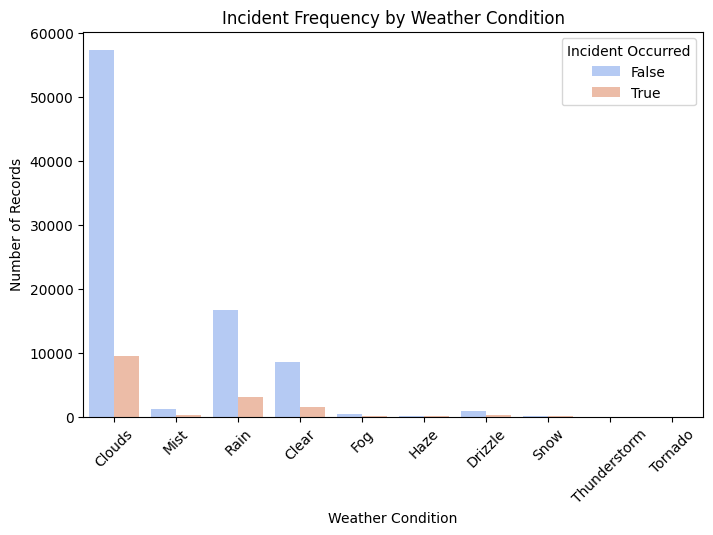

In [64]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))     #Create a figure with a fixed size
sns.countplot(data=df, x='weather_main', hue='is_incident', palette='coolwarm') # Countplot shows how many rows belong to each weather category;hue='is_incident' split bar into incident snd non-incident.
plt.title("Incident Frequency by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Records")
plt.xticks(rotation=45) # this will rotate the lables in the x-axis
plt.legend(title='Incident Occurred')
plt.show()

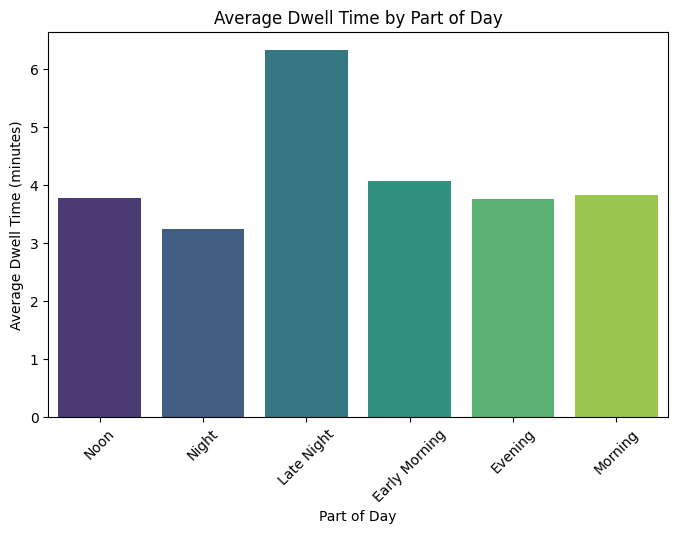

In [65]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x='location_part_of_day',
    y='dwell_time',
    hue='location_part_of_day',   # same variable as x
    errorbar=None,
    palette='viridis',

)
plt.title("Average Dwell Time by Part of Day")
plt.xlabel("Part of Day")
plt.ylabel("Average Dwell Time (minutes)")
plt.xticks(rotation=45)
plt.show()

    2.ii.Relationship explorations: provide any TWO analyses from the following:


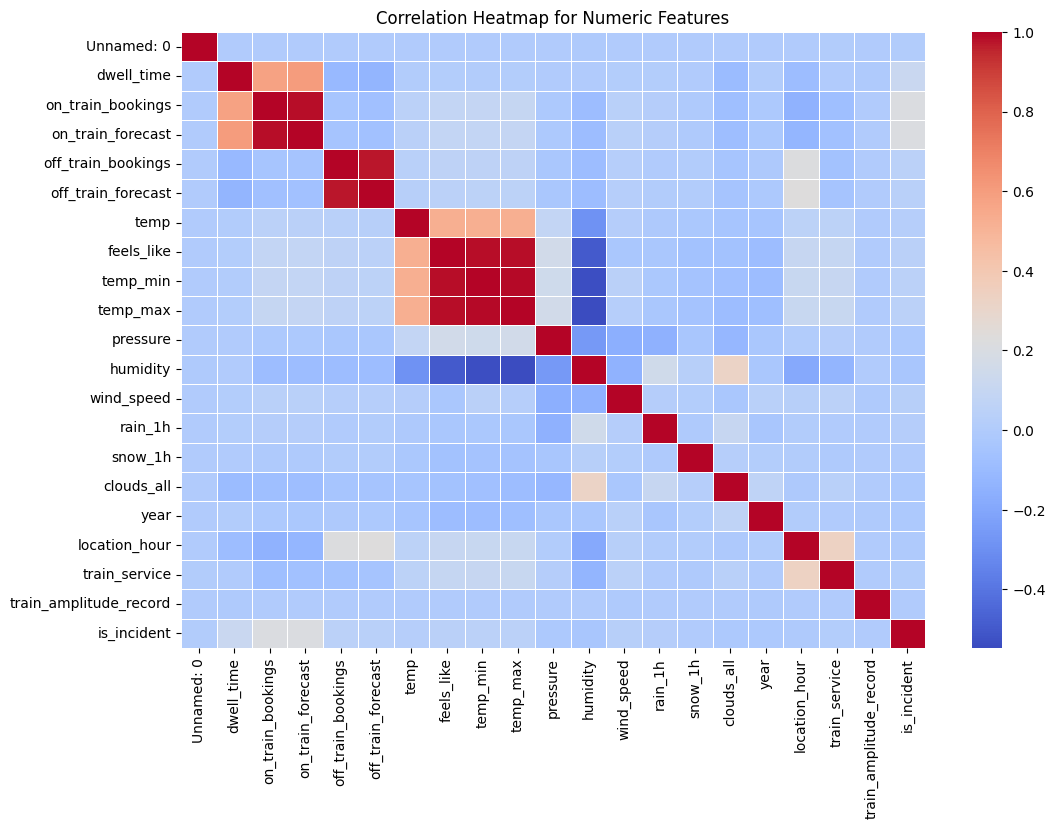

In [66]:
#a. Correlation heatmap/matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Convert boolean target to numeric for correlation
df['is_incident'] = df['is_incident'].astype(int)

# Select numeric features
numeric_features = df.select_dtypes(include=['int64','float64']).corr()

# Create correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_features,cmap='coolwarm', annot=False,linewidths=0.5)
plt.title("Correlation Heatmap for Numeric Features")
plt.show()

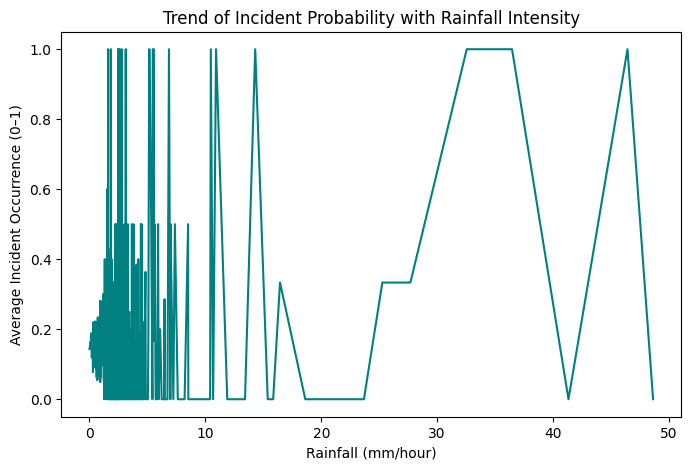

In [67]:
#b. Trend plots
plt.figure(figsize=(8,5))
sns.lineplot(
    data=df,
    x='rain_1h',
    y='is_incident',
    estimator='mean',
    errorbar=None,
    color='teal'
)
plt.title("Trend of Incident Probability with Rainfall Intensity")
plt.xlabel("Rainfall (mm/hour)")
plt.ylabel("Average Incident Occurrence (0–1)")
plt.show()

    2.iii. Target variable analysis: provide any TWO from the following:

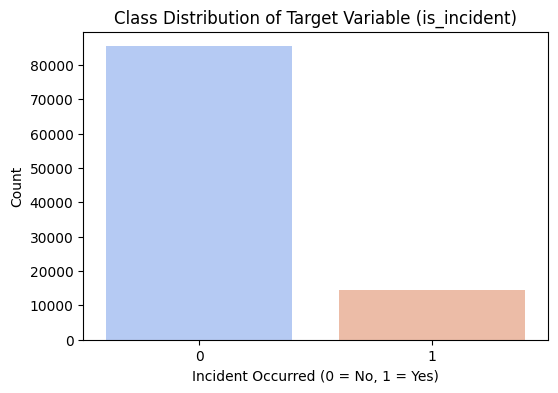

is_incident
0    85.387708
1    14.612292
Name: proportion, dtype: float64


In [68]:
#a. Investigate class balance
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='is_incident', hue='is_incident', palette='coolwarm', legend=False)
plt.title("Class Distribution of Target Variable (is_incident)")
plt.xlabel("Incident Occurred (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Print percentages
class_counts = df['is_incident'].value_counts(normalize=True) * 100
print(class_counts)

In [69]:
#b. Investigate bias
categorical_features = ['day', 'weather_main', 'location',
                        'location_part_of_day', 'month', 'train_service']

for col in categorical_features:
    print(f"\n{col} value distribution:")
    print(df[col].value_counts(normalize=True).round(3) * 100) #normalize=true :Changes the output from counts → proportions (fractions); round(3):3 decimal places. 


day value distribution:
day
Wednesday    14.8
Friday       14.7
Thursday     14.7
Monday       14.7
Tuesday      14.5
Saturday     14.2
Sunday       12.3
Name: proportion, dtype: float64

weather_main value distribution:
weather_main
Clouds          66.8
Rain            19.8
Clear            9.9
Mist             1.4
Drizzle          1.2
Fog              0.6
Haze             0.2
Snow             0.1
Thunderstorm     0.0
Tornado          0.0
Name: proportion, dtype: float64

location value distribution:
location
DON    12.7
PBO    11.5
KGX     8.8
YRK     8.4
NNG     7.8
GRA     7.8
DAR     7.8
NCL     7.5
WKF     7.1
LDS     5.1
DHM     4.8
EDB     4.1
BWK     3.8
RET     2.7
Name: proportion, dtype: float64

location_part_of_day value distribution:
location_part_of_day
Noon             25.3
Evening          24.8
Morning          24.0
Night            14.0
Early Morning    10.7
Late Night        1.2
Name: proportion, dtype: float64

month value distribution:
month
July         11.6
May

    3. Feature engineering and transformation

In [70]:
df.head(15)

,Unnamed: 0,origin,dest,location,dwell_time,on_train_bookings,on_train_forecast,off_train_bookings,off_train_forecast,temp,...,day,location_hour,location_part_of_day,origin_part_of_day,dest_part_of_day,train_route_id,train_service,train_class,train_amplitude_record,is_incident
0,0,EDB,KGX,EDB,9.5,126.0,150.70375,0.0,0.00,18.13,...,Monday,13,Noon,Noon,Evening,E,17,Azuma,-0.053943,0
1,1,EDB,KGX,DON,3.0,8.0,10.07000,13.0,15.85,23.24,...,Wednesday,12,Noon,Morning,Noon,E,10,Azuma,0.064374,0
2,2,KGX,NCL,YRK,5.0,0.0,0.00000,0.0,0.00,15.51,...,Sunday,20,Night,Evening,Night,N,29,Azuma,-0.040326,0
3,3,KGX,LDS,DON,NaN,10.0,12.07000,35.0,39.50,18.98,...,Monday,12,Noon,Morning,Noon,D,10,Azuma,-0.304053,1
4,4,KGX,YRK,GRA,9.5,0.0,0.00000,0.0,0.00,5.16,...,Thursday,0,Late Night,Night,Late Night,N,36,Azuma,-0.049060,0
5,5,KGX,EDB,YRK,4.0,25.0,37.00000,64.0,89.73,18.50,...,Tuesday,12,Noon,Morning,Noon,S,12,Azuma,0.022541,1
6,6,LDS,KGX,DON,1.0,35.0,44.66000,3.0,4.87,15.56,...,Tuesday,7,Early Morning,Early Morning,Morning,A,9,Azuma,0.123775,1
7,7,EDB,KGX,DON,2.0,14.0,15.61000,56.0,67.03,9.17,...,Saturday,19,Evening,Evening,Night,E,24,Azuma,-0.123384,0
8,8,KGX,YRK,KGX,9.5,37.0,43.15000,0.0,0.00,14.02,...,Monday,23,Night,Night,Late Night,N,36,Azuma,0.287834,0
9,9,LDS,KGX,LDS,9.5,114.0,150.70375,0.0,0.00,12.43,...,Saturday,13,Noon,Noon,Noon,A,31,Azuma,-0.160205,0


In [71]:
#Step 1: Identify duplication
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [72]:
df.dtypes.value_counts()


float64    16
object     11
int64       5
Name: count, dtype: int64

In [73]:
df.shape

(99998, 32)

        3.iii. Feature Crossing: Introduce at least ONE new derived feature justified by domain insight

In [74]:
# # Defining peak hours
peak_hours = [7, 8, 9, 16, 17, 18, 19]

df['peak_hour_flag'] = df['location_hour'].apply(lambda x: 1 if x in peak_hours else 0)

# df['bad_weather_flag'] = df['weather_main'].isin(['Rain', 'Snow']).astype(int)

# df['overcrowded_flag'] = (df['on_train_bookings'] > df['on_train_forecast']).astype(int)

# # 1. Booking forecast deviation
# df['booking_forecast_error'] = df['on_train_bookings'] - df['on_train_forecast']

# # 2. Offboarding forecast deviation
# df['offboarding_forecast_error'] = df['off_train_bookings'] - df['off_train_forecast']

# # 3. Temperature spread
# df['temp_spread'] = df['temp_max'] - df['temp_min']

# # 4. Humidity × Wind interaction
# df['humidity_wind_interaction'] = df['humidity'] * df['wind_speed']

# # 5. Rain or snow indicator
# df['rain_or_snow'] = ((df['rain_1h'] > 0) | (df['snow_1h'] > 0)).astype(int)

In [75]:
df.dtypes.value_counts()


float64    16
object     11
int64       6
Name: count, dtype: int64

        3.iv.Feature selection: Identify and justify which features are retained or dropped

In [76]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99998 entries, 0 to 99997
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              99998 non-null  int64  
 1   origin                  99998 non-null  object 
 2   dest                    99998 non-null  object 
 3   location                99998 non-null  object 
 4   dwell_time              92065 non-null  float64
 5   on_train_bookings       99998 non-null  float64
 6   on_train_forecast       99998 non-null  float64
 7   off_train_bookings      99998 non-null  float64
 8   off_train_forecast      99998 non-null  float64
 9   temp                    99998 non-null  float64
 10  feels_like              99998 non-null  float64
 11  temp_min                99998 non-null  float64
 12  temp_max                99998 non-null  float64
 13  pressure                99998 non-null  float64
 14  humidity                99998 non-null

,Unnamed: 0,origin,dest,location,dwell_time,on_train_bookings,on_train_forecast,off_train_bookings,off_train_forecast,temp,...,location_hour,location_part_of_day,origin_part_of_day,dest_part_of_day,train_route_id,train_service,train_class,train_amplitude_record,is_incident,peak_hour_flag
0,0,EDB,KGX,EDB,9.5,126.0,150.70375,0.0,0.00,18.13,...,13,Noon,Noon,Evening,E,17,Azuma,-0.053943,0,0
1,1,EDB,KGX,DON,3.0,8.0,10.07000,13.0,15.85,23.24,...,12,Noon,Morning,Noon,E,10,Azuma,0.064374,0,0
2,2,KGX,NCL,YRK,5.0,0.0,0.00000,0.0,0.00,15.51,...,20,Night,Evening,Night,N,29,Azuma,-0.040326,0,0
3,3,KGX,LDS,DON,NaN,10.0,12.07000,35.0,39.50,18.98,...,12,Noon,Morning,Noon,D,10,Azuma,-0.304053,1,0
4,4,KGX,YRK,GRA,9.5,0.0,0.00000,0.0,0.00,5.16,...,0,Late Night,Night,Late Night,N,36,Azuma,-0.049060,0,0


In [77]:
#cheacking for unique value in this colum
df['train_class'].nunique(), df['train_class'].unique()  

(1, array(['Azuma'], dtype=object))

In [78]:
#dropping the colums
df = df.drop(columns=['Unnamed: 0', 'train_class'], errors='ignore')
df.head()

,origin,dest,location,dwell_time,on_train_bookings,on_train_forecast,off_train_bookings,off_train_forecast,temp,feels_like,...,day,location_hour,location_part_of_day,origin_part_of_day,dest_part_of_day,train_route_id,train_service,train_amplitude_record,is_incident,peak_hour_flag
0,EDB,KGX,EDB,9.5,126.0,150.70375,0.0,0.00,18.13,17.77,...,Monday,13,Noon,Noon,Evening,E,17,-0.053943,0,0
1,EDB,KGX,DON,3.0,8.0,10.07000,13.0,15.85,23.24,23.50,...,Wednesday,12,Noon,Morning,Noon,E,10,0.064374,0,0
2,KGX,NCL,YRK,5.0,0.0,0.00000,0.0,0.00,15.51,14.81,...,Sunday,20,Night,Evening,Night,N,29,-0.040326,0,0
3,KGX,LDS,DON,NaN,10.0,12.07000,35.0,39.50,18.98,19.31,...,Monday,12,Noon,Morning,Noon,D,10,-0.304053,1,0
4,KGX,YRK,GRA,9.5,0.0,0.00000,0.0,0.00,5.16,1.24,...,Thursday,0,Late Night,Night,Late Night,N,36,-0.049060,0,0


In [79]:
df.dtypes.value_counts()

float64    16
object     10
int64       5
Name: count, dtype: int64

In [80]:
# from google.colab import files
# df.to_csv("t111.csv", index=False)

# files.download("t111.csv")

Split the data 


In [81]:
from sklearn.model_selection import train_test_split

# Separate features and target
target_column = 'is_incident'
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (79998, 30)
Test shape: (20000, 30)


    3. i. Missing data handling: apply appropriate imputation or removal strategy with rationale

In [82]:
print("Missing values in TRAIN:")
print(X_train.isna().sum())




Missing values in TRAIN:
origin                       0
dest                         0
location                     0
dwell_time                6365
on_train_bookings            0
on_train_forecast            0
off_train_bookings           0
off_train_forecast           0
temp                         0
feels_like                   0
temp_min                     0
temp_max                     0
pressure                     0
humidity                     0
wind_speed                   0
rain_1h                      0
snow_1h                      0
clouds_all                   0
weather_main                 0
year                         0
month                        0
day                          0
location_hour                0
location_part_of_day         0
origin_part_of_day           0
dest_part_of_day             0
train_route_id               0
train_service                0
train_amplitude_record       0
peak_hour_flag               0
dtype: int64


In [83]:
X_test.head(10)

,origin,dest,location,dwell_time,on_train_bookings,on_train_forecast,off_train_bookings,off_train_forecast,temp,feels_like,...,month,day,location_hour,location_part_of_day,origin_part_of_day,dest_part_of_day,train_route_id,train_service,train_amplitude_record,peak_hour_flag
33968,KGX,LCN,KGX,9.5,65.0,109.29000,0.0,0.00,13.10,12.76,...,May,Tuesday,8,Morning,Morning,Morning,B,80,-0.024448,1
24612,EDB,KGX,DAR,2.0,43.0,48.82000,27.0,30.58,18.98,18.19,...,August,Sunday,18,Evening,Evening,Night,E,22,-0.152636,1
42677,BDQ,KGX,GRA,2.0,49.0,60.72000,5.0,14.45,14.96,14.65,...,September,Wednesday,10,Morning,Morning,Morning,A,19,-0.507466,0
9732,LDS,KGX,WKF,1.0,5.0,7.28000,3.0,3.00,16.60,16.01,...,August,Friday,19,Evening,Evening,Night,A,50,0.163331,1
7129,KGX,LDS,WKF,1.0,0.0,3.08000,19.0,36.21,7.44,3.42,...,December,Tuesday,22,Night,Night,Night,D,32,-0.143670,0
1402,EDB,KGX,DAR,2.0,25.0,30.32000,5.0,21.25,3.44,2.11,...,November,Saturday,18,Evening,Evening,Night,E,22,-0.127096,1
47827,KGX,HGT,KGX,9.5,126.0,150.70375,0.0,0.00,21.29,21.35,...,August,Monday,11,Morning,Morning,Noon,D,12,0.214982,0
9694,ABD,KGX,NCL,NaN,63.0,127.37000,46.0,56.39,9.27,6.00,...,April,Wednesday,14,Noon,Morning,Evening,E,15,-0.141795,0
7126,LDS,KGX,WKF,2.0,25.0,36.53000,19.0,39.35,4.67,1.95,...,December,Tuesday,15,Noon,Noon,Evening,A,39,-0.091013,0
93403,KGX,GLC,KGX,9.5,126.0,150.70375,0.0,0.00,8.24,5.55,...,March,Monday,15,Noon,Noon,Night,S,23,-0.038542,0


In [84]:
from sklearn.linear_model import LinearRegression

# Define columns
impute_target = 'dwell_time'
impute_features = ['on_train_bookings', 'on_train_forecast']

# TRAIN: rows with & without missing dwell_time
train_non_null = X_train[X_train[impute_target].notna()]
train_null = X_train[X_train[impute_target].isna()]

# Fit the model using only TRAIN non-missing rows
lr = LinearRegression()
lr.fit(train_non_null[impute_features], train_non_null[impute_target])

# Predict missing dwell_time in TRAIN
if len(train_null) > 0:
    X_train.loc[train_null.index, impute_target] = lr.predict(train_null[impute_features])

In [85]:
#cheacking if all missing data is resolved after linear regression
test_null = X_test[X_test[impute_target].isna()]

if len(test_null) > 0:
    X_test.loc[test_null.index, impute_target] = lr.predict(test_null[impute_features])
print("Missing in TRAIN after impute:", X_train[impute_target].isna().sum())
print("Missing in TEST after impute:", X_test[impute_target].isna().sum())

Missing in TRAIN after impute: 0
Missing in TEST after impute: 0


In [86]:
X_train.head(10)

,origin,dest,location,dwell_time,on_train_bookings,on_train_forecast,off_train_bookings,off_train_forecast,temp,feels_like,...,month,day,location_hour,location_part_of_day,origin_part_of_day,dest_part_of_day,train_route_id,train_service,train_amplitude_record,peak_hour_flag
92725,KGX,LDS,DON,3.0,15.0,16.50000,16.0,17.63,16.16,15.89,...,May,Tuesday,11,Morning,Morning,Noon,D,9,-0.163777,0
37683,EDB,KGX,RET,2.0,0.0,0.29000,2.0,3.98,11.34,10.70,...,August,Tuesday,23,Night,Evening,Late Night,E,29,-0.073985,0
38241,LDS,KGX,LDS,9.5,28.0,39.03000,0.0,0.00,10.09,9.43,...,December,Saturday,5,Early Morning,Early Morning,Early Morning,A,2,-0.126476,0
3806,KGX,ABD,DAR,3.0,31.0,37.35000,45.0,47.88,15.51,14.94,...,April,Thursday,16,Evening,Noon,Night,W,20,0.072193,1
65307,EDB,KGX,NCL,3.0,56.0,94.68000,7.0,10.12,10.77,10.02,...,November,Tuesday,14,Noon,Noon,Evening,E,16,0.114845,0
6006,KGX,LDS,NNG,1.0,7.0,13.33000,64.0,75.34,5.38,5.38,...,March,Sunday,13,Noon,Noon,Noon,D,13,-0.049715,0
79002,BWK,KGX,NCL,3.0,5.0,9.19000,5.0,10.40,17.36,17.27,...,October,Friday,6,Early Morning,Early Morning,Morning,Y,14,-0.049268,0
44198,KGX,EDB,DAR,2.0,17.0,18.92000,11.0,13.40,17.11,17.07,...,September,Wednesday,9,Morning,Early Morning,Morning,S,5,-0.034425,1
69703,KGX,HGT,KGX,9.5,53.0,150.70375,0.0,0.00,20.14,19.54,...,August,Wednesday,13,Noon,Noon,Evening,D,16,0.048951,0
26922,KGX,ABD,YRK,3.0,40.0,45.00000,50.0,54.81,5.48,2.75,...,February,Wednesday,11,Morning,Morning,Evening,W,11,0.263589,0


In [87]:
X_test

,origin,dest,location,dwell_time,on_train_bookings,on_train_forecast,off_train_bookings,off_train_forecast,temp,feels_like,...,month,day,location_hour,location_part_of_day,origin_part_of_day,dest_part_of_day,train_route_id,train_service,train_amplitude_record,peak_hour_flag
33968,KGX,LCN,KGX,9.5,65.0,109.29,0.0,0.00,13.10,12.76,...,May,Tuesday,8,Morning,Morning,Morning,B,80,-0.024448,1
24612,EDB,KGX,DAR,2.0,43.0,48.82,27.0,30.58,18.98,18.19,...,August,Sunday,18,Evening,Evening,Night,E,22,-0.152636,1
42677,BDQ,KGX,GRA,2.0,49.0,60.72,5.0,14.45,14.96,14.65,...,September,Wednesday,10,Morning,Morning,Morning,A,19,-0.507466,0
9732,LDS,KGX,WKF,1.0,5.0,7.28,3.0,3.00,16.60,16.01,...,August,Friday,19,Evening,Evening,Night,A,50,0.163331,1
7129,KGX,LDS,WKF,1.0,0.0,3.08,19.0,36.21,7.44,3.42,...,December,Tuesday,22,Night,Night,Night,D,32,-0.143670,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49933,KGX,EDB,PBO,1.0,28.0,29.88,15.0,22.82,21.67,21.90,...,September,Saturday,16,Evening,Noon,Night,S,23,-0.248845,1
81077,KGX,LDS,NNG,9.5,0.0,0.00,2.0,5.35,100.00,11.03,...,May,Thursday,1,Late Night,Night,Late Night,D,36,0.218657,0
45553,LDS,KGX,GRA,2.0,30.0,32.90,28.0,29.28,20.41,20.05,...,June,Sunday,13,Noon,Noon,Noon,A,29,-0.190031,0
22640,KGX,EDB,YRK,3.0,68.0,69.41,30.0,33.97,6.98,3.23,...,January,Friday,10,Morning,Morning,Noon,S,9,0.154725,0


    3.ii. Feature Encoding & Scaling:
        a. Encode categorical features using appropriate encoding techniques        
        b. Scale numeric features using appropriate techniques

In [88]:
#split the data in X_train as numeric and categorical
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numeric_cols     = X_train.select_dtypes(include=['int64', 'float64']).columns

print("Categorical cols:", list(categorical_cols))
print("Numeric cols:", list(numeric_cols))

Categorical cols: ['origin', 'dest', 'location', 'weather_main', 'month', 'day', 'location_part_of_day', 'origin_part_of_day', 'dest_part_of_day', 'train_route_id']
Numeric cols: ['dwell_time', 'on_train_bookings', 'on_train_forecast', 'off_train_bookings', 'off_train_forecast', 'temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'year', 'location_hour', 'train_service', 'train_amplitude_record', 'peak_hour_flag']


In [89]:
#scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_cols),
        ('categorical', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ]
)

In [90]:
preprocessor 

,transformers,"[('numeric', ...), ('categorical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [91]:
X_train

,origin,dest,location,dwell_time,on_train_bookings,on_train_forecast,off_train_bookings,off_train_forecast,temp,feels_like,...,month,day,location_hour,location_part_of_day,origin_part_of_day,dest_part_of_day,train_route_id,train_service,train_amplitude_record,peak_hour_flag
92725,KGX,LDS,DON,3.0,15.0,16.50,16.0,17.63,16.16,15.89,...,May,Tuesday,11,Morning,Morning,Noon,D,9,-0.163777,0
37683,EDB,KGX,RET,2.0,0.0,0.29,2.0,3.98,11.34,10.70,...,August,Tuesday,23,Night,Evening,Late Night,E,29,-0.073985,0
38241,LDS,KGX,LDS,9.5,28.0,39.03,0.0,0.00,10.09,9.43,...,December,Saturday,5,Early Morning,Early Morning,Early Morning,A,2,-0.126476,0
3806,KGX,ABD,DAR,3.0,31.0,37.35,45.0,47.88,15.51,14.94,...,April,Thursday,16,Evening,Noon,Night,W,20,0.072193,1
65307,EDB,KGX,NCL,3.0,56.0,94.68,7.0,10.12,10.77,10.02,...,November,Tuesday,14,Noon,Noon,Evening,E,16,0.114845,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,LDS,KGX,GRA,2.0,76.0,76.25,23.0,25.00,13.28,12.70,...,June,Saturday,12,Noon,Morning,Noon,A,26,0.243130,0
54886,LCN,KGX,GRA,2.0,13.0,15.19,2.0,3.54,18.01,17.35,...,June,Friday,14,Noon,Noon,Noon,B,85,0.031268,0
76820,KGX,EDB,YRK,6.0,126.0,145.26,30.0,30.85,16.80,16.23,...,May,Friday,9,Morning,Morning,Noon,S,7,0.282900,1
860,EDB,KGX,NCL,5.0,61.0,116.49,12.0,17.40,6.15,6.15,...,January,Thursday,17,Evening,Evening,Night,E,22,0.129683,1


    4. Model Development, Experimentation & Reproducible Pipeline (18marks total)
        i. Build a reproducible ML pipeline

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=500,class_weight='balanced',random_state=42))
])

# X_train_processed=pipe.fit(X_train, y_train)
# Fit pipeline on training data
pipe.fit(X_train, y_train)

# Output from the colum trnsformer returns a Numpy Array so -this is only for converting to a DataFrame for visualisation
X_train_processed = pipe.named_steps['preprocessor'].transform(X_train)

y_pred = pipe.predict(X_test)

In [93]:
# Precision = Of all predicted positive incidents (y_pred = 1),how many were actually correct?
# Recall = Of all REAL incidents (actual y_test = 1),how many did the model successfully find?
# F1 Score = Harmonic mean of Precision and Recall.F1 is high only if BOTH are good.
# Accuracy = Of ALL predictions, how many did the model get right?But accuracy is misleading for imbalanced datasets.


#how will it impact
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Baseline Metrics
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred, zero_division=0)
lr_recall = recall_score(y_test, y_pred, zero_division=0)
lr_f1 = f1_score(y_test, y_pred, zero_division=0)

print("Baseline Accuracy:", lr_accuracy)
print("Baseline Precision:", lr_precision)
print("Baseline Recall:",lr_recall)
print("Baseline F1:", lr_f1)




Baseline Accuracy: 0.682
Baseline Precision: 0.25578736781937694
Baseline Recall: 0.6084296397008837
Baseline F1: 0.36016096579476864


In [94]:
# This is Auto logging 

# import mlflow
# mlflow.set_tracking_uri("file:mlruns")
# mlflow.sklearn.autolog()

# with mlflow.start_run(run_name="LogisticRegression"):
#     pipe.fit(X_train, y_train)
#     y_pred = pipe.predict(X_test)

    4.iii.Experimental logging: Provide reproducible experiment logs (notebooks/ML tracking).

In [95]:
import mlflow

mlflow.set_tracking_uri("file:///Users/aswanathjs/Documents/home/ML_COURSEWORK/mlruns")
mlflow.set_registry_uri("file:///Users/aswanathjs/Documents/home/ML_COURSEWORK/mlruns")
mlflow.set_experiment("TNR_Incident_Prediction")


<Experiment: artifact_location='file:///Users/aswanathjs/Documents/home/ML_COURSEWORK/mlruns/304465982824805687', creation_time=1764422622525, experiment_id='304465982824805687', last_update_time=1764422622525, lifecycle_stage='active', name='TNR_Incident_Prediction', tags={}>

In [96]:
import mlflow
import mlflow.sklearn

with mlflow.start_run(run_name="LogisticRegression"):

    # 1. Log model parameters
    mlflow.log_params({
        "model_type": "Logistic Regression",
        "max_iter": 500,
        "class_weight": "balanced"
    })

    # 2. Log metrics
    mlflow.log_metrics({
        "accuracy": lr_accuracy,
        "precision": lr_precision,
        "recall": lr_recall,
        "f1_score": lr_f1
    })

    # 3. Log the full pipeline (preprocessing + model)
    mlflow.sklearn.log_model(pipe, "logistic_regression_model")

print("Logged Logistic Regression to MLflow!")


2025/12/01 12:07:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/01 12:07:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged Logistic Regression to MLflow!


In [97]:
X_train_processed = pipe.named_steps['preprocessor'].transform(X_train)   #used just to see the output

X_train_processed

array([[-0.26496798, -0.54367205, -0.63085081, ...,  0.        ,
         0.        ,  0.        ],
       [-0.60429027, -0.90707849, -0.96355651, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.94062692, -0.2287198 , -0.16842887, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.7529989 ,  2.14553562,  2.01191209, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.41367661,  0.57077437,  1.42141591, ...,  0.        ,
         0.        ,  0.        ],
       [-0.94361257, -0.37408238, -0.40548938, ...,  0.        ,
         0.        ,  0.        ]], shape=(79998, 151))

In [98]:
print(preprocessor.named_transformers_)

{'numeric': StandardScaler(), 'categorical': OneHotEncoder(handle_unknown='ignore', sparse_output=False)}


In [99]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

ohe_features = pipe.named_steps['preprocessor'].named_transformers_['categorical'].get_feature_names_out(categorical_cols)

all_features = list(numeric_cols) + list(ohe_features)


In [100]:
import pandas as pd

X_train_df = pd.DataFrame(X_train_processed, columns=all_features) # setting colums as all_feature will give names to colums
X_train_df.head()


,dwell_time,on_train_bookings,on_train_forecast,off_train_bookings,off_train_forecast,temp,feels_like,temp_min,temp_max,pressure,...,train_route_id_D,train_route_id_E,train_route_id_F,train_route_id_G,train_route_id_H,train_route_id_N,train_route_id_S,train_route_id_W,train_route_id_Y,train_route_id_Z
0,-0.264968,-0.543672,-0.630851,-0.207308,-0.309621,0.205239,0.578915,0.425597,0.613438,-0.046637,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.604290,-0.907078,-0.963557,-0.646939,-0.680256,-0.250091,-0.204637,-0.336257,-0.297167,-0.301312,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.940627,-0.228720,-0.168429,-0.709743,-0.788323,-0.368175,-0.396373,-0.519967,-0.637775,1.820975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.264968,-0.156039,-0.202910,0.703356,0.511749,0.143835,0.435491,0.440006,0.359720,1.056952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.264968,0.449639,0.973772,-0.489928,-0.513538,-0.303937,-0.307299,-0.402897,-0.335398,-0.725769,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
#for downloarding engineered data

# X_train_df.to_csv("final_engineered_data.csv", index=False)
# from IPython.display import FileLink
# FileLink("final_engineered_data.csv")

    4.ii.Implement at least two candidate models: Implement and justify ≥2 model families relevant to the problem (e.g., Logistic Regression, Random Forest, etc).

In [102]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=42,
        class_weight='balanced'   # helps with incident imbalance
    ))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, zero_division=0)

print("Baselien Random Forest Accuracy:", accuracy_rf)
print("Baselien Random Forest Precision:", precision_rf)
print("Baselien Random Forest Recall:", recall_rf)
print("Baselien Random Forest F1:", f1_rf)

Baselien Random Forest Accuracy: 0.8599
Baselien Random Forest Precision: 0.6434426229508197
Baselien Random Forest Recall: 0.10673011556764106
Baselien Random Forest F1: 0.18309037900874636


In [104]:
#logging random forest
import mlflow
import mlflow.sklearn

with mlflow.start_run(run_name="RandomForest"):

    # 1. Log model parameters
    mlflow.log_params({
        "model_type": "Random Forest",
        "n_estimators": 200,
        "max_depth": None,
        "class_weight": "balanced",
        "random_state": 42
    })

    # 2. Log metrics
    mlflow.log_metrics({
        "accuracy": accuracy_rf,
        "precision": precision_rf,
        "recall": recall_rf,
        "f1_score": f1_rf
    })

    # 3. Log full pipeline (preprocessing + model)
    mlflow.sklearn.log_model(rf_model, "random_forest_model")

print("Logged Random Forest to MLflow!")


2025/12/01 12:07:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


2025/12/01 12:07:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged Random Forest to MLflow!


In [105]:

from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute imbalance ratio for scale_pos_weight
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
print("scale_pos_weight =", ratio)

xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=ratio,
    random_state=42
)

xgb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

# Train
xgb_pipe.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_pipe.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print("\nBaselien XGBoost Results:")
print("Baselien Accuracy:", acc)
print("Baselien Precision:", prec)
print("Baselien Recall:", rec)
print("Baselien F1 Score:", f1)


scale_pos_weight = 5.855012853470437

Baselien XGBoost Results:
Baselien Accuracy: 0.71165
Baselien Precision: 0.2877535687453043
Baselien Recall: 0.650917743031951
Baselien F1 Score: 0.3990830467854538


In [106]:
import mlflow
import mlflow.sklearn

with mlflow.start_run(run_name="XGBoost"):

    # 1. Log model parameters
    mlflow.log_params({
        "model_type": "XGBoost",
        "n_estimators": 300,
        "learning_rate": 0.05,
        "max_depth": 6,
        "subsample": 0.8,
        "colsample_bytree": 0.8,
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "scale_pos_weight": ratio,   # you computed this earlier
        "random_state": 42
    })

    # 2. Log metrics
    mlflow.log_metrics({
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1_score": f1
    })

    # 3. Log the full pipeline (preprocessing + model)
    mlflow.sklearn.log_model(xgb_pipe, "xgboost_model")

print("Logged XGBoost to MLflow!")


2025/12/01 12:07:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


2025/12/01 12:08:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged XGBoost to MLflow!


    4.IV.Hyperparameter tuning: Apply any ONE systematic tuning and report search space & results:
        a. GridSearchCV
        b. RandomizedCV

    -using gridsearch for logical regression model

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=42))
])


param_grid = {
    "model__C": [0.01, 0.1, 1, 10, 100],         # Regularisation strength
    "model__solver": ["lbfgs", "liblinear"],    # Both support L2
    "model__class_weight": ["balanced", None],  # For imbalance
    "model__max_iter": [300, 500, 1000]         # Enough to converge
}


grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring="f1",     # Best metric for imbalanced datasets
    n_jobs=-1         # Use all cores
)

grid.fit(X_train, y_train)


best_lr = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
print("Best CV F1 Score:", grid.best_score_)


y_pred_tuned = best_lr.predict(X_test)

print("\n--- Test Set Performance (Tuned Logistic Regression) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Precision:", precision_score(y_test, y_pred_tuned))
print("Recall:", recall_score(y_test, y_pred_tuned))
print("F1 Score:", f1_score(y_test, y_pred_tuned))


Best Parameters: {'model__C': 100, 'model__class_weight': 'balanced', 'model__max_iter': 300, 'model__solver': 'lbfgs'}
Best CV F1 Score: 0.3594172683353354

--- Test Set Performance (Tuned Logistic Regression) ---
Accuracy: 0.6815
Precision: 0.2559794988610478
Recall: 0.611148878314072
F1 Score: 0.36082681115793697


In [108]:
import mlflow
import mlflow.sklearn

# -----------------------------
# MLflow Logging for Tuned Logistic Regression
# -----------------------------

with mlflow.start_run(run_name="Tuned Logistic Regression"):

    #Log model parameters (best params from GridSearch)
    mlflow.log_param("model_type", "LogisticRegression (Tuned)")
    mlflow.log_param("best_C", grid.best_params_["model__C"])
    mlflow.log_param("best_solver", grid.best_params_["model__solver"])
    mlflow.log_param("best_class_weight", grid.best_params_["model__class_weight"])
    mlflow.log_param("best_max_iter", grid.best_params_["model__max_iter"])

    #Log metrics
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred_tuned))
    mlflow.log_metric("precision", precision_score(y_test, y_pred_tuned))
    mlflow.log_metric("recall", recall_score(y_test, y_pred_tuned))
    mlflow.log_metric("f1_score", f1_score(y_test, y_pred_tuned))

    #Save the tuned model
    mlflow.sklearn.log_model(best_lr, artifact_path="tuned_logistic_regression_model")

print("Tuned Logistic Regression logged successfully to MLflow.")


2025/12/01 12:13:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


2025/12/01 12:13:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Tuned Logistic Regression logged successfully to MLflow.


    -Randomized search method for XGboost

In [109]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
print("scale_pos_weight =", ratio)

xgb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        scale_pos_weight=ratio,
        random_state=42,
        tree_method="hist"   # FASTEST on CPU
    ))
])

param_dist = {
    "model__n_estimators": [100, 200, 300, 400, 500],   # Official: n_estimators (Python wrapper)
    "model__learning_rate": [0.01, 0.03,0.05,0.1, 0.2],     # Official: eta (alias: learning_rate)
    "model__max_depth": [3, 4, 5, 7, 8, 10],            # Official: max_depth
    "model__subsample": [0.6, 0.7, 0.8, 0.9, 1.0],      # Official: subsample
    "model__colsample_bytree": [0.6, 0.7, 0.8, 1.0],    # Official: colsample_bytree
    "model__min_child_weight": [1, 3, 5, 7],            # Official: min_child_weight
    "model__gamma": [0, 0.1, 0.3, 0.5],                 # Official: gamma (min_split_loss)
    "model__reg_lambda": [1, 2, 5, 10],                 # Official: lambda (alias: reg_lambda)
    "model__reg_alpha": [0, 0.1, 0.5, 1]                # Official: alpha (alias: reg_alpha)
}
# Randomized Search
xgb_rand = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=param_dist,
    n_iter=25,               # number of random combinations
    scoring="f1",
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
xgb_rand.fit(X_train, y_train)

#Best Model & Results
best_xgb = xgb_rand.best_estimator_
print("\nBest Parameters:", xgb_rand.best_params_)
print("Best CV F1 Score:", xgb_rand.best_score_)

#Test evaluation
y_pred_xgb_tuned = best_xgb.predict(X_test)

print("\n--- Tuned XGBoost Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_tuned))
print("Precision:", precision_score(y_test, y_pred_xgb_tuned))
print("Recall:", recall_score(y_test, y_pred_xgb_tuned))
print("F1 Score:", f1_score(y_test, y_pred_xgb_tuned))


scale_pos_weight = 5.855012853470437
Fitting 3 folds for each of 25 candidates, totalling 75 fits

Best Parameters: {'model__subsample': 0.9, 'model__reg_lambda': 10, 'model__reg_alpha': 0.5, 'model__n_estimators': 500, 'model__min_child_weight': 7, 'model__max_depth': 10, 'model__learning_rate': 0.03, 'model__gamma': 0.1, 'model__colsample_bytree': 0.7}
Best CV F1 Score: 0.39980477012073606

--- Tuned XGBoost Performance ---
Accuracy: 0.76925
Precision: 0.3279160666529521
Recall: 0.5418082936777702
F1 Score: 0.40856080994489297


In [110]:
import mlflow
import mlflow.sklearn

with mlflow.start_run(run_name="Tuned XGBoost"):

    # Log best parameters
    for param, value in xgb_rand.best_params_.items():
        mlflow.log_param(param, value)

    # Log metrics
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred_xgb_tuned))
    mlflow.log_metric("precision", precision_score(y_test, y_pred_xgb_tuned))
    mlflow.log_metric("recall", recall_score(y_test, y_pred_xgb_tuned))
    mlflow.log_metric("f1_score", f1_score(y_test, y_pred_xgb_tuned))

    # Log full pipeline
    mlflow.sklearn.log_model(best_xgb, artifact_path="tuned_xgboost_model")

print("Tuned XGBoost logged successfully!")


2025/12/01 12:14:55 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/01 12:14:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Tuned XGBoost logged successfully!


    4.v. Tests: Include any ONE basic test :
        b.Model predicts returns correct shape:

In [111]:
import numpy as np

def test_prediction_shape(trained_model, X_input):
    """
    Functional Test:
    Ensures the model's prediction output has the correct shape.
    
    Checks:
    - Output is a NumPy array
    - Output is 1-dimensional
    - Output length matches number of input samples
    """
    predictions = trained_model.predict(X_input)

    assert isinstance(predictions, np.ndarray), "WRONG IF Output must be a NumPy array."
    assert predictions.ndim == 1, "WRONG IF Predictions must be a 1D array."
    assert len(predictions) == len(X_input), (
        f"WRONG IF Prediction length ({len(predictions)}) does not match input length ({len(X_input)})."
    )

    print("✔ TEST PASSED: Prediction shape is correct.")


In [112]:
# Use a batch of 100 samples from X_test
X_test_sample = X_test.iloc[:100]

# Run test
test_prediction_shape(best_xgb, X_test_sample)


✔ TEST PASSED: Prediction shape is correct.


    4.vi. Versioning & artefacts: Save model artefacts with version identifiers

In [113]:
import sys
import sklearn
import xgboost
import mlflow
from datetime import datetime
import os


model_version = "v1_0"

with mlflow.start_run(run_name=f"Tuned_XGBoost_{model_version}"):
    # 1.Log Environment Versions
    mlflow.set_tag("python_version", sys.version.split()[0])
    mlflow.set_tag("sklearn_version", sklearn.__version__)
    mlflow.set_tag("xgboost_version", xgboost.__version__)
    mlflow.set_tag("mlflow_version", mlflow.__version__)
    mlflow.set_tag("version", model_version)

    # 2.Log Your requirements.txt
    if os.path.exists("requirements.txt"):
        mlflow.log_artifact("requirements.txt")

    # 3.Log hyperparameters
    for param, value in xgb_rand.best_params_.items():
        mlflow.log_param(param, value)

    # 4.Log metrics
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred_xgb_tuned))
    mlflow.log_metric("precision", precision_score(y_test, y_pred_xgb_tuned))
    mlflow.log_metric("recall", recall_score(y_test, y_pred_xgb_tuned))
    mlflow.log_metric("f1_score", f1_score(y_test, y_pred_xgb_tuned))

    # 5.Save model artifact
    mlflow.sklearn.log_model(best_xgb, artifact_path=f"xgboost_{model_version}")

    print(" Model and dependency versions logged!")


2025/12/01 12:14:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


2025/12/01 12:15:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


 Model and dependency versions logged!


    5.Model Evaluation, deployment and Monitoring 
        i.Evaluate the models using the appropriate metrics


In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def evaluate_model(name, y_true, y_pred):
    """
    Returns a dictionary containing evaluation metrics for a model.
    """
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),#if i want we can also add parameter zero_fivision=0 : i.e,Return 0 instead of throwing an error. Recommended!; zero_fivision=1 : Return 1 (rarely useful).
        "Recall": recall_score(y_true, y_pred,),
        "F1-score": f1_score(y_true, y_pred, )
    }

results = []
# 1.Baseline Logistic Regression
results.append(evaluate_model(
    "Baseline Logistic Regression",
    y_test,
    y_pred  # your baseline LR prediction variable
))

# 2.Tuned Logistic Regression
results.append(evaluate_model(
    "Tuned Logistic Regression",
    y_test,
    y_pred_tuned  # from best_lr.predict(X_test)
))

# 3.Baseline XGBoost
results.append(evaluate_model(
    "Baseline XGBoost",
    y_test,
    y_pred_xgb  # from xgb_pipe.predict(X_test)
))

# 4.Tuned XGBoost
results.append(evaluate_model(
    "Tuned XGBoost",
    y_test,
    y_pred_xgb_tuned  # from best_xgb.predict(X_test)
))

# 5.Random Forest
results.append(evaluate_model(
    "Baseline Random Forest",
    y_test,
    y_pred_rf
))
#view
df_results = pd.DataFrame(results)
df_results


,Model,Accuracy,Precision,Recall,F1-score
0,Baseline Logistic Regression,0.68200,0.255787,0.608430,0.360161
1,Tuned Logistic Regression,0.68150,0.255979,0.611149,0.360827
2,Baseline XGBoost,0.71165,0.287754,0.650918,0.399083
3,Tuned XGBoost,0.76925,0.327916,0.541808,0.408561
4,Baseline Random Forest,0.85990,0.643443,0.106730,0.183090


    5.ii. Perform k-fold or stratified cross-validation, or any other cross-validation, with justifications

In [115]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, make_scorer

#Use tuned XGBoost model inside pipeline
xgb_final_model = best_xgb   # <-- correct

#1.Define Stratified K-Fold (5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#2.Use F1-score (best for imbalanced datasets)
f1_scorer = make_scorer(f1_score)

#3.Perform cross-validation
cv_scores = cross_val_score(
    xgb_final_model,
    X_train,
    y_train,
    cv=skf,
    scoring=f1_scorer,
    n_jobs=-1
)

print("Cross-Validation F1 Scores:", cv_scores)
print("Mean CV F1 Score:", cv_scores.mean())
print("Std Dev:", cv_scores.std())


Cross-Validation F1 Scores: [0.40696161 0.40889621 0.40781563 0.39255783 0.40591895]
Mean CV F1 Score: 0.40443004681804684
Std Dev: 0.006016378567065413


    5.iii. Visualise results: plot any THREE from the following
            a)roc

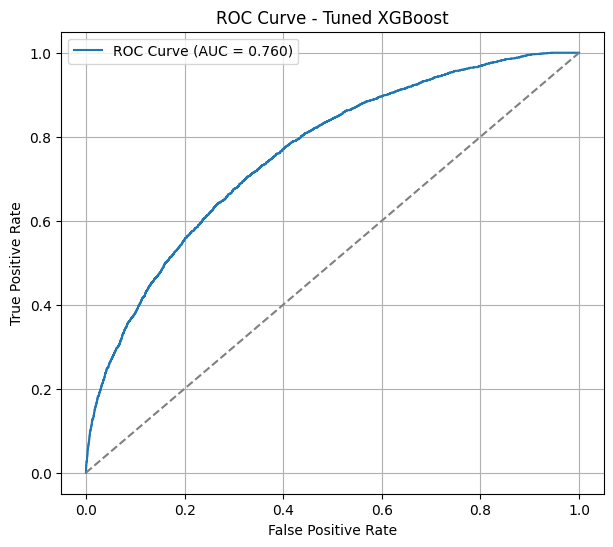

In [116]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probability predictions
y_prob = best_xgb.predict_proba(X_test)[:, 1]

# Compute ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")  # baseline line
plt.title("ROC Curve - Tuned XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


    5.iii.b)Confusion Matrix

<Figure size 600x500 with 0 Axes>

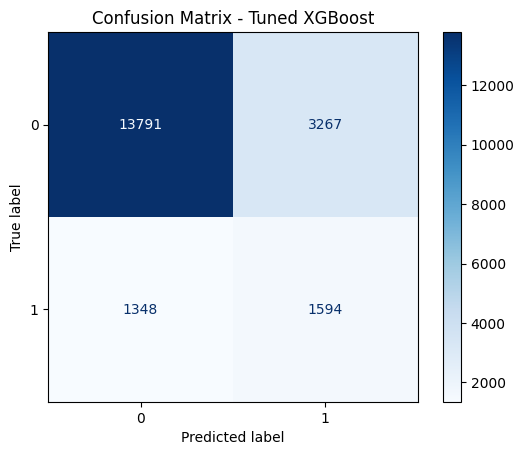

In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_xgb_tuned)

plt.figure(figsize=(6,5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Tuned XGBoost")
plt.grid(False)
plt.show()


    5.iii.c)Precision-recall curves

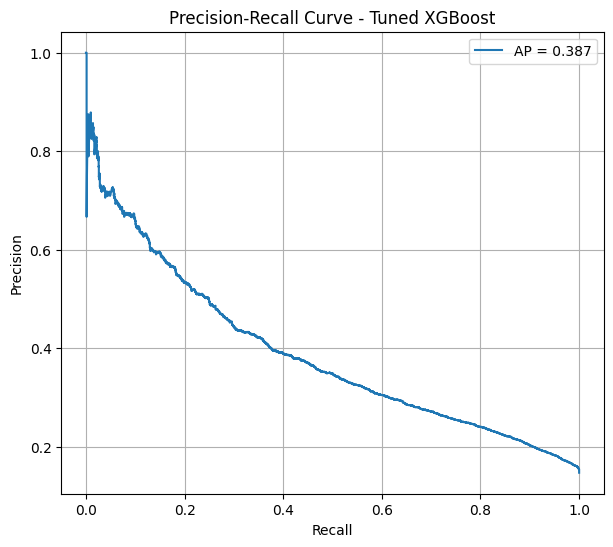

In [118]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
ap_score = average_precision_score(y_test, y_prob)

plt.figure(figsize=(7,6))
plt.plot(recall, precision, label=f"AP = {ap_score:.3f}")
plt.title("Precision-Recall Curve - Tuned XGBoost")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()


In [119]:
import joblib
import os

save_path = "model_artifacts/tuned_xgboost_v1.0"

# Create folder if not exists
os.makedirs(save_path, exist_ok=True)

# Save the tuned model
joblib.dump(best_xgb, f"{save_path}/model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [120]:
loaded_model = joblib.load("model_artifacts/tuned_xgboost_v1.0/model.pkl")
print("Model loaded successfully!")


Model loaded successfully!
